In [46]:
#Code that should be ran previously in the script

import matplotlib.pyplot as plt
import numpy as np
import math
from scipy.interpolate import interp1d
import numpy.random as npr

import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import interp1d
import numpy.random as npr
import axispi as axp

#conversion factor
con1 = 2.56819e-3 #MeV−2,  (DCS MeV-2)/con1 = DCS barns
#----------constants-------------
#Electron and Muon mass squared
mu2 = 105.658**2 #Mev^2
me2 = 0.5110**2 #Mev^2
S = 4*mu2 + 5000 #5000MeV^2 over threshold energy
alpha = 0.007297352 #no unit of measurement
m_muon = 105.6583755 #MeV
m_e = 0.510998 #Mev

#mariams version of  differential and total cross section----------------------------------------
def d_sigma(s,theta):#differential cross section
    d_sig = (alpha**2/(4*s))*(1-(4*m_muon**2)/s)**0.5*((1-(4*m_e**2)/s))**-0.5*(1+(4/s)*(m_e**2+m_muon**2)+(1-(4*m_e**2)/s)*(1-(4*m_muon**2)/s)*np.cos(theta)**2)
    return d_sig

def sigma(s):#total cross section
    sig = 4*np.pi*(alpha**2/(3*s**3))*(1-(4*m_muon**2)/s)**0.5*((1-(4*m_e**2)/s))**-0.5*(2*m_e**2+s)*(2*m_muon**2+s)
    return sig

#a and b constants used to simplify integration
def ab(s):
    #more constants to simplify calculation
    ce = 1-(4*me2/s)
    cu = 1-(4*mu2/s)
    c1 = alpha**2/(4*s)#e**4/(64 * np.pi**2 * s)
    c2 = c1 * cu**(1/2) * ce**(-1/2)

    a = c2 * (1+(4/s)*(me2+mu2))
    b = c2 * (1-(4*mu2/s)) * (1-(4*me2/s))
    return a, b

#############################################################################

#probability density function, PDF of ejection angles
def pdf(theta,s):#theta - ejection angle #s - CoM energy squared
    sig = sigma(s) # mariams
    DCS = d_sigma(s,theta) # mariams
    return (2*np.pi*np.sin(theta)/sig)*DCS

4. write a Monte Carlo simulation that generates scattering events following the distrubtions that you found analytically;

The goal of this section is to sample muon ejection angles from a probability density function that matches the physics of the interaction. The PDF required is the normalised probability density function. The inverse transmorm method is then used to sample angles from this PDF. 


**Inverse Transform Sampling**

The sampling method used is known as Inverse Transmorm Sampling. The goal of this method is to take a random number generated from the uniform probability density function $U$ and pass it into a function, $F(U)$, that returns a sample of our generated dataset $X$. In this case our generated dataset is made of ejection angles. 

$$F(U) = X$$


This function we seek can be shown to be the inverse of the cumulitive density function, CDF, of our probability density function. The CDF is the probability of sampling an event with a value less than $x$.

To prove $CDF^{-1}(U)$ is indeed the function $F(U)$ we use probability notation. 

The CDF is defined as,

$$CDF(x) = \mathbb{P}(X\leq~x).$$ 

If we sub in $F(U) = X$ from before then we get,

$$CDF(x) = \mathbb{P}(F(U)\leq~x).$$ 

If we apply the inverse function $F^{-1}(U)$ to both sides of the inequality then we arrive at,

$$CDF(x) = \mathbb{P}(U \leq~F^{-1}(x)).$$ 

This expresses the probability that a value sampled from the uniform distrubution is less than ${F^-1}(x).$ The uniform distribution is such that the probability of sampling less than a vaue is equal to that value. As can be seen in the uniform distribution below. The probability of sampling an $U < 0.8$ is the area of the blue section before the red line. This is 0.8 of the total area. Therfore $\mathbb{P}(U < 0.8) = 0.8$ and more generally $\mathbb{P}(U < u) = u$.

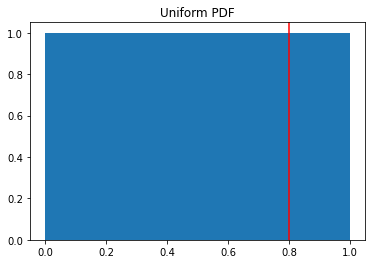

This argument show's that, 

$$CDF(x) = \mathbb{P}(U\leq~F^{-1}(x)) = F^{-1}(x).$$ 

$$CDF(x) = F^{-1}(x).$$

These functions are the inverse of eachother. This means that, $F(x) = CDF{^-1}(x)$. This is true for any value of x. We can sub in the sample from our uniform distribution U and we get. 

$$F(U) = CDF^{-1}(U)$$

$F(U)$ was origionaly defined as a function that will produce our desired dataset X when U is a uniformly distributed random number from 0 to 1. It has now been shown that the inverse of the CDF meets these requirements. Therefore the inverse CDF can be used to sample angles from the normalised differential cross section.



**Finding the CDF**

The PDF for the muon ejection angle that matches the physics of the interaction is, 

$$\mathbb{P}(\theta) = \frac{2\pi\sin\theta}{\sigma}\frac{d\sigma}{d \Omega}$$

The CDF is defined as the integral, 

$$CDF(\theta) = \int^{\theta}_{0}\frac{2\pi\sin\theta}{\sigma}\frac{d\sigma}{d \Omega}~d\theta = \int^{\theta}_{0}\frac{2\pi\sin\theta}{\sigma}[a + b~cos^2(\theta)]~d\theta = \frac{2\pi}{\sigma}\left[-\frac{\cos\theta}{3}(3a+b~\cos^2\theta)\right].$$ 

![CDF.png](attachment:CDF.png)

([<matplotlib.axis.XTick at 0x7f1a9a1d5880>,
 [Text(0.0, 0, '0'),
  Text(0.7853981633974483, 0, '$\\frac{\\pi}{4}$'),
  Text(1.5707963267948966, 0, '$\\frac{\\pi}{2}$'),
  Text(2.356194490192345, 0, '$\\frac{3\\pi}{4}$'),
  Text(3.141592653589793, 0, '$\\pi$')])

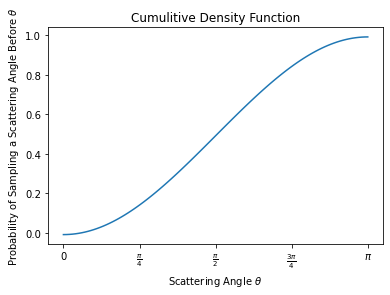

In [47]:
#Cumulitive Density Function. Probability a THETA sampled is less than theta in the function.
def cdf(theta,s):
    a,b = ab(s)
    sig = sigma(s) # mariams
    return (2*np.pi/sig)*((-np.cos(theta)*(3*a+b*np.cos(theta)**2)*1/3)+ a)

theta = np.linspace(0,np.pi,100) #max theta range
CDF = [cdf(th,S) for th in theta] #Cumulative Density Function

figCDF, ax = plt.subplots()
plt.plot(theta,CDF)
plt.title('Cumulitive Density Function')
plt.xlabel(r'Scattering Angle $\theta$')
plt.ylabel(r'Probability of Sampling a Scattering Angle Before $\theta$')
xlables = ['0',r'$\frac{\pi}{4}$',r'$\frac{\pi}{2}$',r'$\frac{3\pi}{4}$',r'$\pi$']
xlocations = [0,np.pi/4,np.pi/2,3*np.pi/4,np.pi]
plt.xticks(ticks = xlocations, labels = xlables)




**Finding The Inverse CDF**

The inverse of this function cannot be found analyticaly. Instead a look up tabel is generated. For many $\theta$ values the value of CDF is calculated and the two values are associated with eachother. The inverse function of finding the CDF from a particular $\theta$ can then be found by looking for the value in the tabel. There is an issue if we want to know the CDF for a theta value we have not calculated. In this case we use linear iterpolation. This simply means we assume the path between two calculated vaues is linear so we can guess any value inbetween. 

SciPy has a function for interpolation called interpl1d and this will be used to create our approximate inverse function.

![CDFinv.png](attachment:CDFinv.png)

([<matplotlib.axis.YTick at 0x7f1a9a2e9550>,
 [Text(0, 0.0, '0'),
  Text(0, 0.7853981633974483, '$\\frac{\\pi}{4}$'),
  Text(0, 1.5707963267948966, '$\\frac{\\pi}{2}$'),
  Text(0, 2.356194490192345, '$\\frac{3\\pi}{4}$'),
  Text(0, 3.141592653589793, '$\\pi$')])

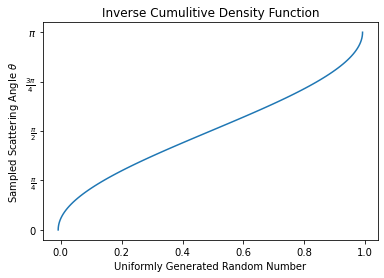

In [48]:
#Theta Generation, Sampling from the PDF, Using Inverse CDF Method
def thetaGen2(howMany,s):#howMany - the number of thetas to generate #s - CoM energy squared
    #generate the lookup table for the inverse function
    theta = np.linspace(0,np.pi,100)
    CDF = [cdf(x,s) for x in theta]
    #thetaPredictor is the inverse CDF brought about using a look up table (theta,CDF) and interpolation
    thetaPredictor = interp1d(CDF, theta, kind = "linear")
    return [float(thetaPredictor(x)) for x in npr.uniform(min(CDF),max(CDF),howMany)]


figCDFinv, ax = plt.subplots()
ax.plot(CDF,theta)
ax.set_title('Inverse Cumulitive Density Function')
ax.set_xlabel(r'Uniformly Generated Random Number')
ax.set_ylabel(r'Sampled Scattering Angle $\theta$')
ylabels = ['0',r'$\frac{\pi}{4}$',r'$\frac{\pi}{2}$',r'$\frac{3\pi}{4}$',r'$\pi$']
ylocations = [0,np.pi/4,np.pi/2,3*np.pi/4,np.pi]
plt.yticks(ticks = ylocations, labels = ylabels)




**Plotting The Distribution**

This function can now be used to generate a large number of muon scattering angles that follow the distribution.



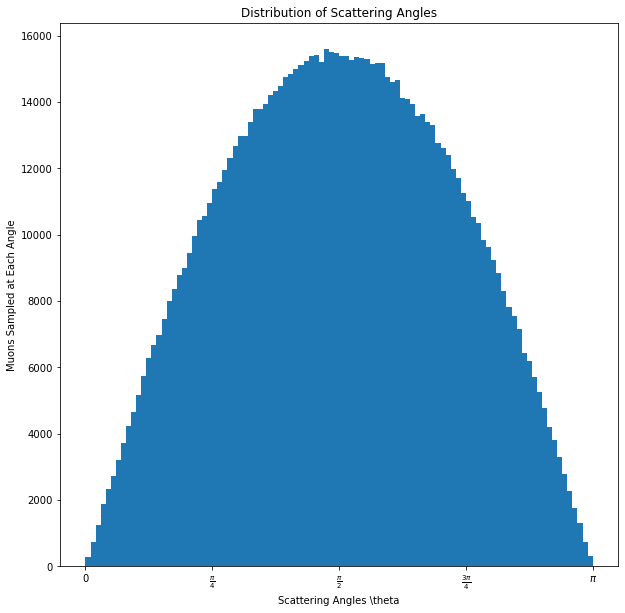

In [49]:
#
generatedThetas = thetaGen2(int(10e5),S)

figThetaGen2 , ax = plt.subplots(figsize = (10,10))
hist = plt.hist(generatedThetas, bins = 100)
y = hist[0]
binEdge = hist[1]
bincenters = 0.5 * (binEdge[1:]+binEdge[:-1])
binwidth = binEdge[1]-binEdge[0]
plt.title('Distribution of Scattering Angles')
plt.ylabel('Muons Sampled at Each Angle')
plt.xlabel(r'Scattering Angles \theta')
xlables = ['0',r'$\frac{\pi}{4}$',r'$\frac{\pi}{2}$',r'$\frac{3\pi}{4}$',r'$\pi$']
xlocations = [0,np.pi/4,np.pi/2,3*np.pi/4,np.pi]
plt.xticks(ticks = xlocations, labels = xlables)
plt.show()

**Considerations For a Realistic Beam Shape**

The positron beam is assumed to have a gaussian energy distribution. The center of the beam is given an energy of $E_{LAB} = 743714~MeV$. This value is the minimum beam energy required to penetrate the entire 3cm thick Berillium Block as will be shown in a later part. The full width half maximum of the beam is assumed to be 0.5Gev or 500MeV.

A random positron energy is sampled from this gaussian and used to find the center of mass energy via the following formulation.

$$s = 2m_e^2+2m_e~E_{LAB}$$
Equation taken from https://web.physics.utah.edu/~jui/5110/hw/kin_rel.pdf

This center of mass energy can then be used to generate an inverse CDF via the previous explained methods. Which in turn is used to sample a scattering angle of the correct distribution.

In [ ]:
def thetaGen3(howMany):#howMany - the number of thetas to generate #s - CoM energy squared
    E_lab_mean = 47571.03
    fwhm = 500 #MeV
    std = fwhm/(2*np.sqrt(2*np.log(2)))
    E_lab = npr.normal(loc = E_lab_mean, scale = std, size = howMany)
    s = 2*me2+2*m_e*E_lab
    theta = np.linspace(0,np.pi,100) #theta range used for inverse CDF calc
    thetas = [] #list to hold generated thetas
    for i in range(howMany):
        CDF = [cdf(x,s[i]) for x in theta]
    #thetaPredictor is the inverse CDF brought about using a look up table (theta,CDF) and interpolation
        thetaPredictor = interp1d(CDF, theta, kind = "linear")
        thetas.append(float(thetaPredictor(npr.uniform(min(CDF),max(CDF)))))
    return thetas

figThetaGen3 , ax = plt.subplots(figsize = (10,5))
generatedThetas = thetaGen3(int(10e4))
hist = plt.hist(generatedThetas, bins = 100)
y = hist[0]
binEdge = hist[1]
bincenters = 0.5 * (binEdge[1:]+binEdge[:-1])
binwidth = binEdge[1]-binEdge[0]
plt.title('Scattering Angles, from a Gaussian Positron Beam')
plt.ylabel('Number of Muons Sampled at Each Angle')
plt.xlabel(r'Scattering Angles \theta')
xlables = ['0',r'$\frac{\pi}{4}$',r'$\frac{\pi}{2}$',r'$\frac{3\pi}{4}$',r'$\pi$']
xlocations = [0,np.pi/4,np.pi/2,3*np.pi/4,np.pi]
plt.xticks(ticks = xlocations, labels = xlables)
plt.show()


In [ ]:
import timeit
def CDFtimeTest(size,kind):
    thetaSM = np.linspace(0,np.pi,size)
    CDF2 = [cdf(x,S) for x in thetaSM]
    #thetaPredictor is the inverse CDF brought about using a look up table (theta,CDF) and interpolation
    cdfPredictor = interp1d(thetaSM, CDF2, kind = kind)
    CDF2 = [cdfPredictor(th) for th in theta]

print("Linear: 5 points")
%timeit CDFtimeTest(5,"linear")

print("Linear: 10 points")
%timeit CDFtimeTest(10,"linear")

print("Linear: 100 points")
%timeit CDFtimeTest(100,"linear")

print("Linear: 1000 points")
%timeit CDFtimeTest(1000,"linear")

print("Quadratic: 5 points")
%timeit CDFtimeTest(5,"quadratic")

print("Quadratic: 10 points")
%timeit CDFtimeTest(10,"quadratic")

print("Quadratic: 100 points")
%timeit CDFtimeTest(100,"quadratic")

print("Quadratic: 1000 points")
%timeit CDFtimeTest(1000,"quadratic")

**%Timeit Results**

It turns out that using a quadratic with 10 points is about the same as a linear with 100 points. Using 1000 points tripples or doubles the time. Everything else was comparibly larger and I needed to minamise the time. 

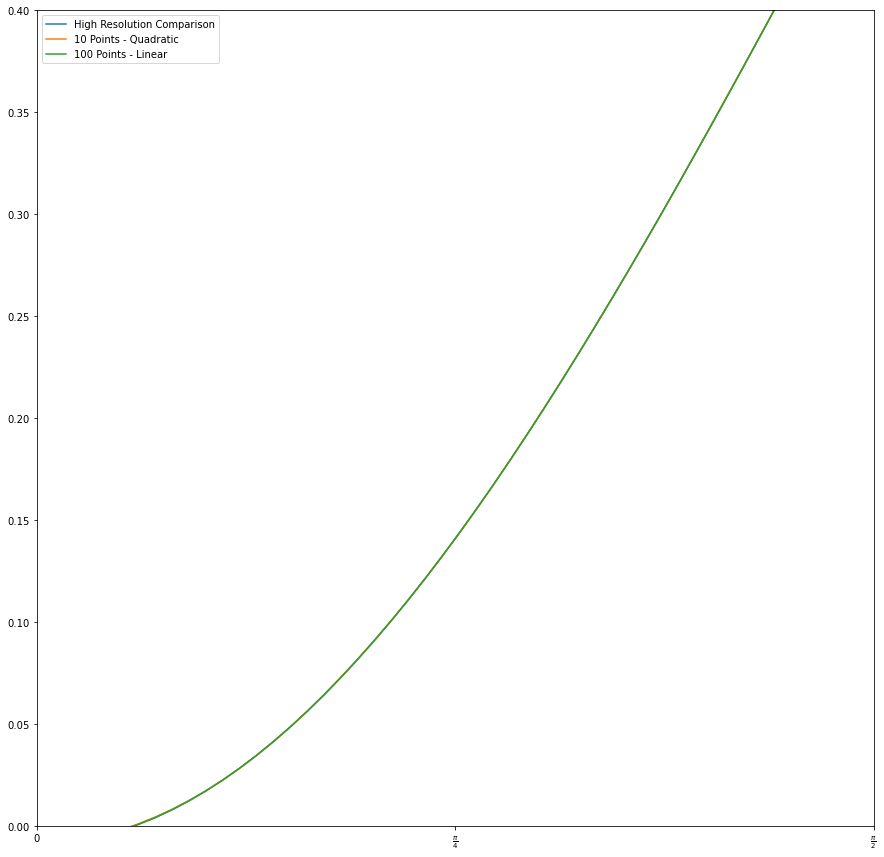

In [45]:
figCDF, ax = plt.subplots(figsize = (15,15))
plt.plot(theta,CDF, label = 'High Resolution Comparison')
xlables = ['0',r'$\frac{\pi}{4}$',r'$\frac{\pi}{2}$',r'$\frac{3\pi}{4}$',r'$\pi$']
xlocations = [0,np.pi/4,np.pi/2,3*np.pi/4,np.pi]
plt.xticks(ticks = xlocations, labels = xlables)
    
thetaSM = np.linspace(0,np.pi,10)
CDF2 = [cdf(x,S) for x in thetaSM]
cdfPredictor = interp1d(thetaSM, CDF2, kind = 'quadratic')
CDF2 = [cdfPredictor(th) for th in theta]   
plt.plot(theta,CDF2,label = '10 Points - Quadratic')

thetaSM = np.linspace(0,np.pi,100)
CDF2 = [cdf(x,S) for x in thetaSM]
cdfPredictor = interp1d(thetaSM, CDF2, kind = 'linear')
CDF2 = [cdfPredictor(th) for th in theta]   
plt.plot(theta,CDF2,label = '100 Points - Linear')
plt.xlim(0,np.pi/2)
plt.ylim(0,0.4)
plt.legend()



Added to mariams part

**Finding the Probability Density Function**

The differential crossection equation is repeated below. It expresses probability that an event happens at each possible scattering angle $\theta$ (**reference**).

\begin{equation}
\frac{d\sigma}{d \Omega} =\frac{\alpha^{2}}{4s} \frac{\sqrt{1-\frac{4 m_{\mu}^{2}}{s}}}{\sqrt{1-\frac{4 m_{e}^{2}}{s}}}\left(1+\frac{4}{s}\left(m_{e}^{2}+m_{\mu}^{2}\right)+\left(1-\frac{4 m_{e}^{2}}{s}\right)\left(1-\frac{4 m_{\mu}^{2}}{s}\right) \cos ^{2} \theta\right) 
\end{equation}

The differential cross section can be simplified as,

$$\frac{d\sigma}{d \Omega} = a + b~cos^2(\theta)$$

where,

$$a = \frac{\alpha^{2}}{4s} \frac{\sqrt{1-\frac{4 m_{\mu}^{2}}{s}}}{\sqrt{1-\frac{4 m_{e}^{2}}{s}}}\left[1+\frac{4}{s}(m_e^2+m_\mu^2)\right]$$

$$b = \frac{\alpha^{2}}{4s} \frac{\sqrt{1-\frac{4 m_{\mu}^{2}}{s}}}{\sqrt{1-\frac{4 m_{e}^{2}}{s}}}\left[\left(1-\frac{4m_\mu^2}{s}\right)\left(1-\frac{4m_e^2}{s}\right)\right].$$

The differential cross section can be used as a PDF to sample the random numbers if we normalise it using the total cross section. The integral of a PDF over it's entire range should equal one. The integral of the differential cross section over it's entire range equals the total crossection. Therfore if we divide through by the total cross section we get a normalised PDF.

$$\int^{4\pi~sr}_{0}\frac{d\sigma}{d \Omega} d\Omega = \sigma $$

$$\int^{4\pi~sr}_{0}\frac{1}{\sigma}\frac{d\sigma}{d \Omega} d\Omega = 1 $$

The probability density function of ejected muons having a solid angle $\Omega$ is then,

$$\mathbb{P}(\Omega) = \frac{1}{\sigma}\frac{d\sigma}{d \Omega}$$

To find the probability density function in terms of theta we can integrate over phi.

$$\mathbb{P}(\Omega) = \int^{2\pi}_{0} \frac{1}{\sigma}\frac{d\sigma}{d \Omega} \sin\theta~d\phi$$

$$\mathbb{P}(\theta) = \frac{2\pi\sin\theta}{\sigma}\frac{d\sigma}{d \Omega}$$
 
The aim is to sample random numbers (ejection angles, $\theta$) from this probability density function.
